# ML with skLearn
## Overview

In this notebook I utilized Python 3 for machine learning. This included pandas for creating/processing the dataframe from the Auto.csv file. Along with seaborn to plot and explore the data. Finally skLearn to train, test, split, and create machine learning models for logistic regression, decision tree, and neural network.

### Reading in the Data with pandas

In [1]:
# importing pandas
import pandas as pd
# using pandas to read Auto.csv
df = pd.read_csv('Auto.csv')
# outputting the first few rows
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70.0,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70.0,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70.0,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70.0,1,amc rebel sst
4,17.0,8,302.0,140,3449,NaN,70.0,1,ford torino


In [2]:
# outputting the dimensions
print("\nDimensions of data frame: ", df.shape)


Dimensions of data frame:  (392, 9)


### Data Exploration & Processing

#### With pandas describe()

In [3]:
# using describe() for the mpg, weight, and year columns

# For mpg
print("\nMPG:")
print(df.mpg.describe())
# For mpg the range is 37.6 and the average is 23.45

# For weight
print("\nWeight:")
print(df.weight.describe())
# For weight the range is 3527 and the average is 2977.58

# For year
print("\nYear:")
print(df.year.describe())
# For year the range is 12 and the average is 76.01


MPG:
count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

Weight:
count     392.000000
mean     2977.584184
std       849.402560
min      1613.000000
25%      2225.250000
50%      2803.500000
75%      3614.750000
max      5140.000000
Name: weight, dtype: float64

Year:
count    390.000000
mean      76.010256
std        3.668093
min       70.000000
25%       73.000000
50%       76.000000
75%       79.000000
max       82.000000
Name: year, dtype: float64


#### Data types with Pandas

In [4]:
# Checking the data types of all columns
print("Types of all columns:")
print(df.dtypes)

print("\nHead of our data frame:")
df.head()

Types of all columns:
mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year            float64
origin            int64
name             object
dtype: object

Head of our data frame:


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70.0,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70.0,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70.0,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70.0,1,amc rebel sst
4,17.0,8,302.0,140,3449,NaN,70.0,1,ford torino


In [5]:
# Changing the cylinders column to catagorical (using cat.codes)
df.cylinders = df.cylinders.astype('category').cat.codes

# Changing the origin column to categorical (without using cat.codes)
df.origin = df.origin.astype('category')

# Verify our changes with dtypes
print("\n\nTypes of all columns in df after change:")
print(df.dtypes)
print("\nHead of our data frame after change:")
df.head()



Types of all columns in df after change:
mpg              float64
cylinders           int8
displacement     float64
horsepower         int64
weight             int64
acceleration     float64
year             float64
origin          category
name              object
dtype: object

Head of our data frame after change:


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,4,307.0,130,3504,12.0,70.0,1,chevrolet chevelle malibu
1,15.0,4,350.0,165,3693,11.5,70.0,1,buick skylark 320
2,18.0,4,318.0,150,3436,11.0,70.0,1,plymouth satellite
3,16.0,4,304.0,150,3433,12.0,70.0,1,amc rebel sst
4,17.0,4,302.0,140,3449,NaN,70.0,1,ford torino


As you can see above, our cylinders column is of type int8 (instead of int64) and our origin column is of type category (instead of int64).

#### Process NAs

In [6]:
# Deleting rows with NAs
df = df.dropna()
# Outputting the new dimensions
print("Dimensions of data frame after drop: ", df.shape)

Dimensions of data frame after drop:  (389, 9)


#### Modifying Columns

In [7]:
# Creating a new column mpg_high
# will be cateorical where:
# column == 1 if mpg > avg mpg, else column == 0
df['mpg_high'] = df.apply(lambda row: 1 if row['mpg'] > df['mpg'].mean() else 0, axis=1)
# Removing the mpg and name columns
# (prevents our models from using name and mpg as predictors)
df = df.drop(columns=['mpg', 'name'])

# Outputting the first few rows of our modified data frame
df.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg_high
0,4,307.0,130,3504,12.0,70.0,1,0
1,4,350.0,165,3693,11.5,70.0,1,0
2,4,318.0,150,3436,11.0,70.0,1,0
3,4,304.0,150,3433,12.0,70.0,1,0
6,4,454.0,220,4354,9.0,70.0,1,0


As you can see above, we no longer have the mpg or name columns and have created a new binary column for mpg_high which will be our new target column.

#### Data Exploration with graphs (seaborn)

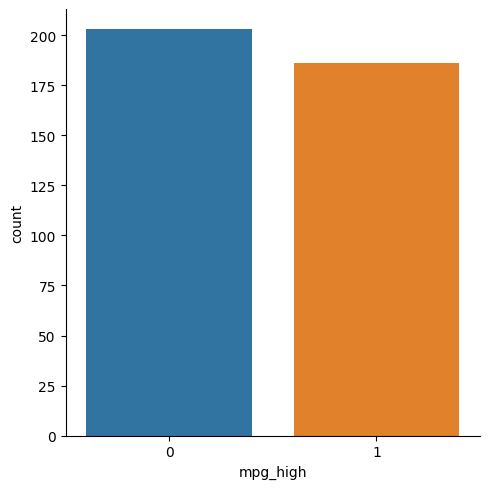

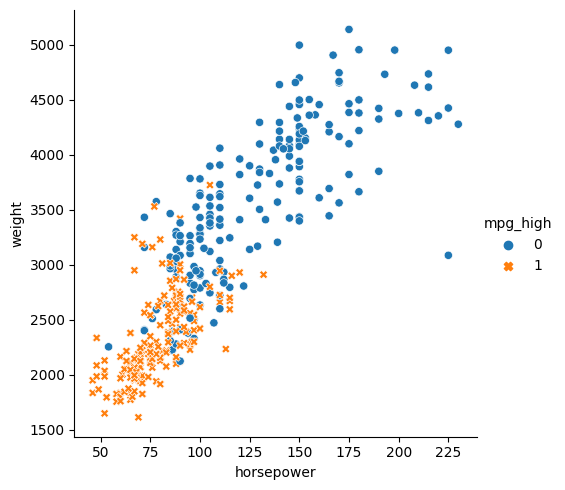

In [8]:
# Importing seaborn
import seaborn as sb
# Importing matplotlib.pyplot to easily show the seaborn graphs
import matplotlib.pyplot as plt

# Plotting the mpg_high column
print(sb.catplot(x='mpg_high', kind='count', data=df))
# Replotting with x-axis = horsepower, y-axis = weight,
# and setting hue/style to mpg_high (I did both to easily differentiate overlaping observations)
print(sb.relplot(x='horsepower', y='weight', data=df, hue=df.mpg_high, style=df.mpg_high))

AxesSubplot(0.125,0.11;0.775x0.77)


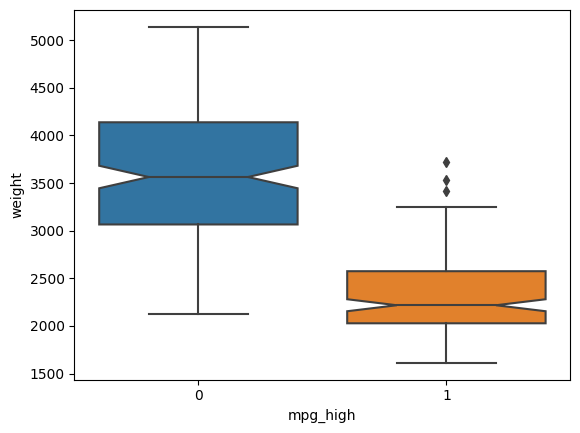

In [9]:
# Plotting a boxplot with x-axis = mpg_high and y-axis = weight
# Note: is separated or it will overlap the graph above it!
print(sb.boxplot(x='mpg_high', y='weight', data=df, notch=True))

##### Analyzing our Graphs

###### Categorical Plot:

From this plot we can observe that our data is very evenly distributed. While there is slightly more cars with a low mpg, the difference between the graphs is only around 25 out of nearly 200 observations for both.

###### Relational Plot:

From this plot we discovered that all of the mpg_high automobiles must have relatively lower horsepower and weight compared to lower mpg. As you can see in the graph most high mpg observations have a horsepower of 100 or less and a weight of 3000 or less. You can also see that there are exceptions to this rule for lower mpg, supporting the fact that just because horsepower and weight are low doesn't mean necessarily that the mpg will be high. This could make it more difficult for our models to predict, hopefully the other predictors will help clarify! You can also spot quite a few outliers.

###### Box Plot:

From this plot we can determine that weight is a good predictor with few outliers. You can see a clear distintion between the high and low mpg vehicles based on just their weight and distance in the plot. It also further shows how limited the range is for the high mpg automobiles excluding the outliers. 

### Splitting our Data for train & test with skLearn

In [10]:
# Import skLearn's train_test_split
from sklearn.model_selection import train_test_split

# Splitting by 80/20 for train/test, saved as X_train, X_test...
# with seed 1234 for replicable results
# Also, setting the X data frames without the target column mpg_high, y contains only the target column
X_train, X_test, y_train, y_test = train_test_split(
    df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']],
    df[['mpg_high']], test_size=0.2, random_state=1234, stratify=df[['mpg_high']])

# Outputting the dimensions of train and test
print("Dimensions of train data frame: ", X_train.shape)
print("Dimensions of train data frame: ", X_test.shape)

Dimensions of train data frame:  (311, 7)
Dimensions of train data frame:  (78, 7)


### Logistic Regression with skLearn

In [11]:
# Import our model from skLearn
from sklearn.linear_model import LogisticRegression
# Training using solver lbfgs
linreg = LogisticRegression(solver='lbfgs', random_state=1234)
linreg.fit(X_train, y_train.values.ravel())
print("Accuracy on Training Data: ", linreg.score(X_train, y_train))

# Testing/Evaluating
linregpred = linreg.predict(X_test)

# Importing the classification report from skLearn
from sklearn.metrics import classification_report
# Printing the classification report
print("\nClassification Report on Test Data:")
print(classification_report(y_test, linregpred))

Accuracy on Training Data:  0.9003215434083601

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        41
           1       0.89      0.84      0.86        37

    accuracy                           0.87        78
   macro avg       0.87      0.87      0.87        78
weighted avg       0.87      0.87      0.87        78



### Decision Tree with skLearn

Accuracy on Training Data:  1.0

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        41
           1       0.92      0.89      0.90        37

    accuracy                           0.91        78
   macro avg       0.91      0.91      0.91        78
weighted avg       0.91      0.91      0.91        78



[Text(0.5769230769230769, 0.875, 'X[1] <= 190.5\ngini = 0.499\nsamples = 311\nvalue = [162, 149]'),
 Text(0.3076923076923077, 0.625, 'X[3] <= 2305.0\ngini = 0.296\nsamples = 177\nvalue = [32, 145]'),
 Text(0.15384615384615385, 0.375, 'X[0] <= 0.5\ngini = 0.058\nsamples = 100\nvalue = [3, 97]'),
 Text(0.07692307692307693, 0.125, '\n  (...)  \n'),
 Text(0.23076923076923078, 0.125, '\n  (...)  \n'),
 Text(0.46153846153846156, 0.375, 'X[5] <= 78.5\ngini = 0.47\nsamples = 77\nvalue = [29, 48]'),
 Text(0.38461538461538464, 0.125, '\n  (...)  \n'),
 Text(0.5384615384615384, 0.125, '\n  (...)  \n'),
 Text(0.8461538461538461, 0.625, 'X[4] <= 21.6\ngini = 0.058\nsamples = 134\nvalue = [130, 4]'),
 Text(0.7692307692307693, 0.375, 'X[5] <= 80.5\ngini = 0.044\nsamples = 133\nvalue = [130, 3]'),
 Text(0.6923076923076923, 0.125, '\n  (...)  \n'),
 Text(0.8461538461538461, 0.125, '\n  (...)  \n'),
 Text(0.9230769230769231, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

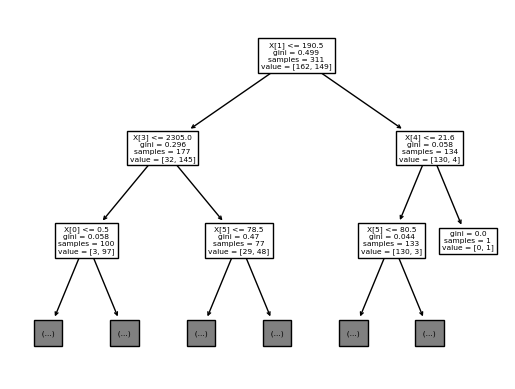

In [12]:
# Import our model from skLearn
from sklearn.tree import DecisionTreeClassifier

# Training our tree
tree = DecisionTreeClassifier(random_state=1234)
tree.fit(X_train, y_train)
print("Accuracy on Training Data: ", tree.score(X_train, y_train))

# Testing/Evaluating
treepred = tree.predict(X_test)

# Importing the classification report from skLearn
from sklearn.metrics import classification_report
# Printing the classification report
print("\nClassification Report on Test Data:")
print(classification_report(y_test, treepred))

# Importing plot_tree from skLearn
from sklearn.tree import plot_tree
# Plotting the tree
plot_tree(tree, max_depth=2)

### Neural Network with skLearn

In [13]:
# First we need to scale our X data!
# Import and create our scaler
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Importing our model from skLearn
from sklearn.neural_network import MLPClassifier
# Training our neural network, using topology(6,4,1)
neunet1 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(4),
                       max_iter=500, random_state=1234)
neunet1.fit(X_train_scaled, y_train.values.ravel())
print("Accuracy on Training Data for 1st Neural Network: ", neunet1.score(X_train_scaled, y_train))

# Testing/Evaluating our first network
neunet1pred = neunet1.predict(X_test_scaled)

# Importing the classification report from skLearn
from sklearn.metrics import classification_report
# Printing the classification report
print("\nClassification Report on Test Data for 1st Neural Network:")
print(classification_report(y_test, neunet1pred))

# Training our neural network, using topology(6,2,1)
neunet2 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(2),
                       max_iter=500, random_state=1234)
neunet2.fit(X_train_scaled, y_train.values.ravel())
print("Accuracy on Training Data for 2nd Neural Network: ", neunet2.score(X_train_scaled, y_train))

# Testing/Evaluating our second network
neunet2pred = neunet2.predict(X_test_scaled)

# Printing the classification report
print("\nClassification Report on Test Data for 2nd Neural Network:")
print(classification_report(y_test, neunet2pred))

Accuracy on Training Data for 1st Neural Network:  0.9807073954983923

Classification Report on Test Data for 1st Neural Network:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        41
           1       0.87      0.89      0.88        37

    accuracy                           0.88        78
   macro avg       0.88      0.88      0.88        78
weighted avg       0.89      0.88      0.88        78

Accuracy on Training Data for 2nd Neural Network:  0.932475884244373

Classification Report on Test Data for 2nd Neural Network:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        41
           1       0.94      0.89      0.92        37

    accuracy                           0.92        78
   macro avg       0.92      0.92      0.92        78
weighted avg       0.92      0.92      0.92        78



### Analysis of Results

#### Best Overall: Neural Network

The Neural Network algorithm outperformed both Logistic Regression and Decision Tree. It was almost a tie with Decision Tree, but nonetheless the Neural Network came out on top. Which is fairly impressive since Neural Networks typically need a lot more data than this small [Auto.csv](Auto.csv) file with only 389 observations after NA removal. I think this shows just how powerful Neural Networks are at predicting if configured optimally.

#### Comparison of Metrics

To start with, none of these models had poor metrics and all of them were very fast to run. Starting with the Logistic Regression model had an accuracy of 87%, which is a good accuracy score. With percision scores of .86 and .89 which shows that it did a good job of retrieving only relevent items. It had recall scores of .90 and .84 which shows that it did a good job of retrieving nearly all the relevent items.

Next, the Decision Tree model had an accuracy of 91%, which is an execellent accuracy score. With percision scores of .90 and .92 which shows that it did a better job of retrieving only relevent items compared to the Logistic Regression Model. It had recall scores of .93 and .89 which shows that it did a better job of retrieving nearly all the relevent items compared to the Logistic Regression Model. Initially I was worried that the decision tree overfit the data because of its 100% accuracy on the training data, it could possibly have a higher accuracy if it was pruned.

Finally, the two Neural Network models. Starting with the first, it had an accuracy of 88%, which is a good accuracy score. With percision scores of .90 and .87 which shows that it did a better job of retrieving only relevent items compared to the Logistic Regression Model, but performed worse than the Decision Tree model. It had recall scores of .88 and .89 which shows that it did a better job of retrieving nearly all the relevent items compared to the Logistic Regression Model, but performed worse than the Decision Tree model. I think this is because it overfit the data as seen by its much higher accuracy on the training data. Next, the second Neural Network mode, it had an accuracy of 92%, which is an execellent score. With percision scores of .91 and .94 which shows that it did a better job of retrieving only relevent items compared to the Logistic Regression Model and the Decision Tree model. It had recall scores of .95 and .89 which shows that it did a better job of retrieving nearly all the relevent items compared to the Logistic Regression Model and the Decision Tree model. I think this is because it didn't overfit the data like the first neural network model as seen by its identical accuracy on the training data. This is very impressive that it was able to not overfit too much on such a small dataset.

#### Why Neural Network was best?

I believe the Neural Network algorithm was best because it is more complex and can create a more rigourous function compared to the simpiler algorithms. Because Logistic regression relies on trying to find an ideal line between the data, it couldn't handle most of the outliers and overlap seen during the data exploration. A simliar problem with the Decision Tree. While it did perform well, if the dataset was larger and more complex the similcity of making splits would likely cause the accuracy to drop. In contrast, the Neural Network seemed to handle the outliers very well by creating a very complex function. If our data set was larger and more complex it would like perform even better. I think this is the main reason why the Neural Network is best, because it doesn't try to predict using an extremely simple method, it has an edge compared to the other algorithms and can handle more complex/non-linear data.

#### R vs skLearn

Personally, I am much much familiar with python than R. Although I do see the appeal of R in terms of speed for some algorithms and for people comming from a statistics background. The plots are also very easy and well implemented in R compared to python. Also, R has some really good libraries for merging and manipulating columns. But, skLearn gives a very uniform way to implement nearly all algorithms which is very helpful and makes the process easy syntax wise. I also have a better understanding of the python errors and skLearn documentation compared to R.